<a href="https://colab.research.google.com/github/vaibhv0311/calorie_prediction/blob/main/Calories_Burnt_and_Intake_Prediction_using_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
pip install git+https://github.com/slundberg/shap.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/slundberg/shap.git to /tmp/pip-req-build-n2fc1rp4
  Running command git clone -q https://github.com/slundberg/shap.git /tmp/pip-req-build-n2fc1rp4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.41.0-cp37-cp37m-linux_x86_64.whl size=2719524 sha256=dd0051a1625919c976aebafc0fe0eeb4184c4288ac07b7c450942e94a93baafc
  Stored in directory: /tmp/pip-ephem-wheel-cache-vcc93xq7/wheels/2b/50/ba/b1868152380d067a5c83623f5d6244d4dabe5ad45e8f885437
Successfully built shap


In [ ]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

Data Collection & Processing

In [ ]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/calories.csv')

In [ ]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [ ]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

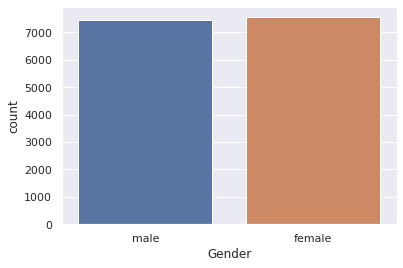

In [ ]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

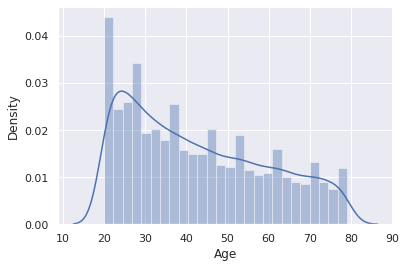

In [ ]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

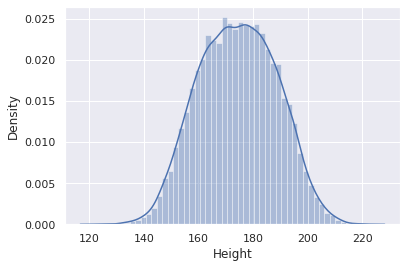

In [ ]:
# finding the distribution of "Height" column
sns.distplot(calories_data['Height'])

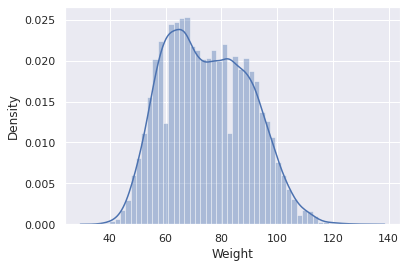

In [ ]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

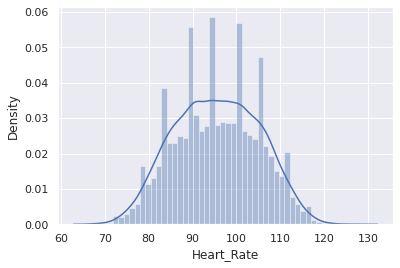

In [ ]:
# finding the distribution of "Heart Rate" column
sns.distplot(calories_data['Heart_Rate'])

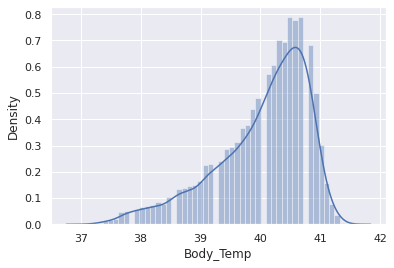

In [ ]:
# finding the distribution of "Body Temperature" column
sns.distplot(calories_data['Body_Temp'])

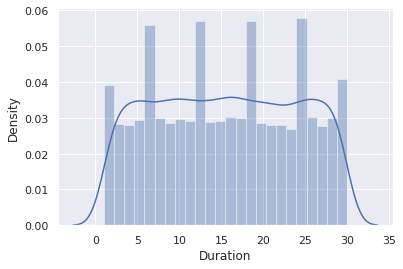

In [ ]:
# finding the distribution of "Duration" column
sns.distplot(calories_data['Duration'])

Finding the Correlation in the dataset

1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = calories_data.corr()

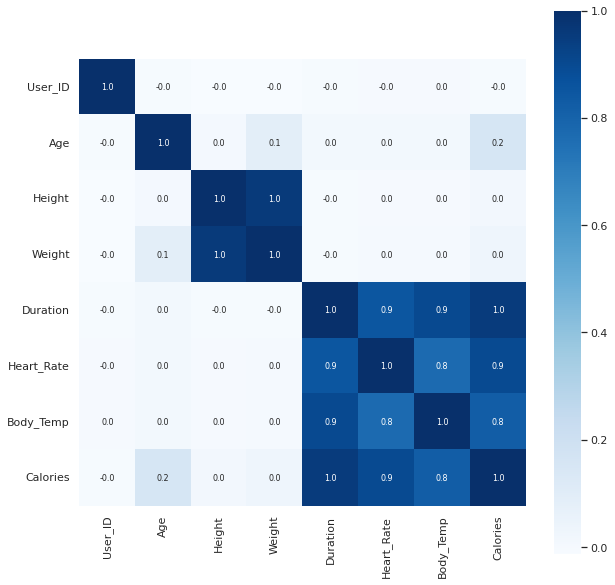

In [ ]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231.0
1,14861698,1,20,166,60,14,94,40.3,66.0
2,11179863,0,69,179,79,5,88,38.7,26.0
3,16180408,1,34,179,71,13,100,40.5,71.0
4,17771927,1,27,154,58,10,81,39.8,35.0


Separating features and Target

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
shap.initjs()

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

[14:56:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

Prediction on Test Data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


Mean Absolute Error

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  2.7159012502233186


In [ ]:
!npm install -g --unsafe-perm ijavascript zeromq
!ijsinstall --install=global
!jupyter-kernelspec list

npm WARN deprecated uuid@3.4.0: Please upgrade  to version 7 or higher.  Older versions may use Math.random() in certain circumstances, which is known to be problematic.  See https://v8.dev/blog/math-random for details.
/tools/node/bin/ijs -> /tools/node/lib/node_modules/ijavascript/bin/ijavascript.js
/tools/node/bin/ijsconsole -> /tools/node/lib/node_modules/ijavascript/bin/ijsconsole.js
/tools/node/bin/ijsinstall -> /tools/node/lib/node_modules/ijavascript/bin/ijsinstall.js
/tools/node/bin/ijskernel -> /tools/node/lib/node_modules/ijavascript/lib/kernel.js
/tools/node/bin/ijsnotebook -> /tools/node/lib/node_modules/ijavascript/bin/ijsnotebook.js

> zeromq@5.3.0 install /tools/node/lib/node_modules/ijavascript/node_modules/zeromq
> node-gyp-build || npm run build:libzmq

make: Entering directory '/tools/node/lib/node_modules/ijavascript/node_modules/zeromq/build'
  ACTION binding_gyp_libzmq_target_prepare_build zmq/BUILD_SUCCESS
Building libzmq for linux
build_libzmq.sh: Building vers

In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
i = 4776
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[4776], feature_names=X_train.columns)

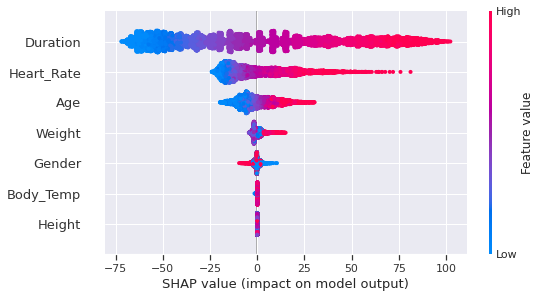

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

In [ ]:
correlation = calories_data.corr()

In [ ]:
intake=pd.read_csv("intake.csv")

In [ ]:
intake.head()

,User_ID,Intake
0,14733363,2788.1868
1,14861698,2501.0414
2,11179863,2070.7236
3,16180408,2599.0380
4,17771927,2156.7492


In [ ]:
intake_data=pd.concat([exercise_data,intake['Intake']],axis=1)

In [ ]:
intake_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Intake
0,14733363,male,68,190,94,29,105,40.8,2788.1868
1,14861698,female,20,166,60,14,94,40.3,2501.0414
2,11179863,male,69,179,79,5,88,38.7,2070.7236
3,16180408,female,34,179,71,13,100,40.5,2599.0380
4,17771927,female,27,154,58,10,81,39.8,2156.7492


In [ ]:
intake_correlation=intake_data.corr()

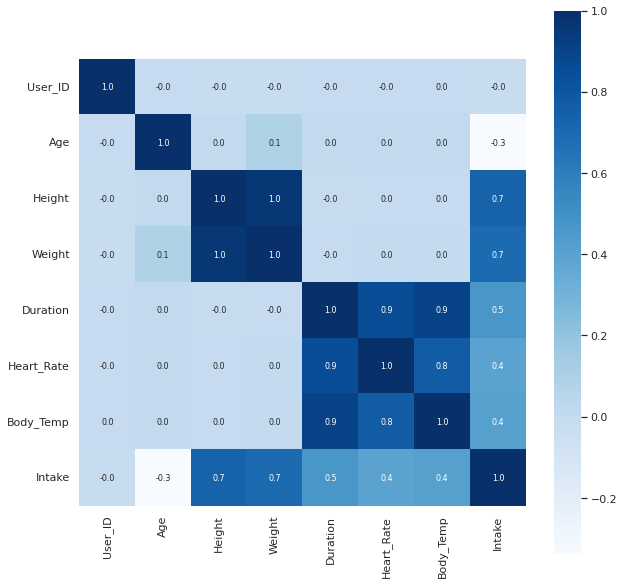

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(intake_correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
intake_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
X = intake_data.drop(columns=['User_ID','Intake'], axis=1)
Y = intake_data['Intake']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
model.fit(X_train,Y_train)

[14:58:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[2695.2476 2764.626  2217.6143 ... 2308.0142 2131.346  2351.9004]


In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  19.11092575566406


In [ ]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
i = 4776
shap.force_plot(explainer.expected_value, shap_values[i], features=X_train.loc[4776], feature_names=X_train.columns)

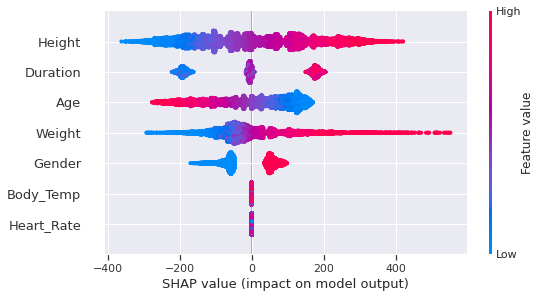

In [ ]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns,)

In [ ]:
workout_data=pd.concat([exercise_data,intake['Intake'],calories['Calories']],axis=1)
workout_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Intake,Calories
0,14733363,male,68,190,94,29,105,40.8,2788.1868,231.0
1,14861698,female,20,166,60,14,94,40.3,2501.0414,66.0
2,11179863,male,69,179,79,5,88,38.7,2070.7236,26.0
3,16180408,female,34,179,71,13,100,40.5,2599.0380,71.0
4,17771927,female,27,154,58,10,81,39.8,2156.7492,35.0


In [ ]:
workout_correlation=workout_data.corr()

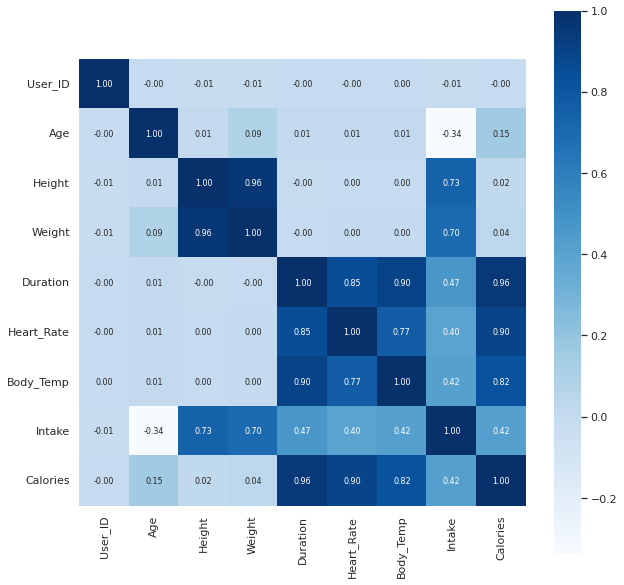

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(workout_correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')